# Exploratory Data Analysis basics

**We are using the Iris dataset for our analysis**

***Steps in EDA***
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset


In [33]:
import numpy as np
import pandas as pd
 
# Reading the CSV file
df = pd.read_csv("iris_errors2.csv")
 
# Printing top 5 rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Providing Descriptions of our sample

In [34]:
#How many rows and columns?
df.shape

(151, 6)

In [35]:
#what type of data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             151 non-null    int64  
 1   SepalLengthCm  151 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  149 non-null    float64
 4   PetalWidthCm   151 non-null    object 
 5   Species        150 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.2+ KB


In [36]:
#Summary statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
count,151.000000,151.000000,150.000000,149.000000
mean,75.993377,5.843709,3.047333,3.773826
std,43.722686,0.825314,0.426583,1.772935
min,1.000000,4.300000,2.000000,1.000000
25%,38.500000,5.100000,2.800000,1.600000
50%,76.000000,5.800000,3.000000,4.400000
75%,113.500000,6.400000,3.300000,5.100000
max,150.000000,7.900000,4.400000,6.900000


In [37]:
data = df.drop_duplicates()
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
#Shape After dropping duplicate rows
data.shape

(150, 6)

In [39]:
df.Species.unique()

array(['Iris-setosa', nan, 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [40]:
#Is our data balanced?
df.value_counts("Species")

Species
Iris-virginica     51
Iris-versicolor    50
Iris-setosa        49
Name: count, dtype: int64

## 2. Check for missing data

In [41]:
#Checking for null/missing values
df.isnull().groupby("Species").sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
False,0,0,1,2,0
True,0,0,0,0,0


In [42]:
df=df.dropna().drop_duplicates()
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             146 non-null    int64  
 1   SepalLengthCm  146 non-null    float64
 2   SepalWidthCm   146 non-null    float64
 3   PetalLengthCm  146 non-null    float64
 4   PetalWidthCm   146 non-null    object 
 5   Species        146 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 8.0+ KB


In [44]:
df["SepalWidthCm"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4.4, 3.8, 3.3, 4.1,
       4.2, 2.3, 2.8, 2.7, 2. , 2.2, 2.5, 2.6, 2.4])

In [45]:
df=df.astype({'PetalWidthCm' : float})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             146 non-null    int64  
 1   SepalLengthCm  146 non-null    float64
 2   SepalWidthCm   146 non-null    float64
 3   PetalLengthCm  146 non-null    float64
 4   PetalWidthCm   146 non-null    float64
 5   Species        146 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


In [46]:
df.shape

(146, 6)

## 3. Visualization (identify the shape of your data)

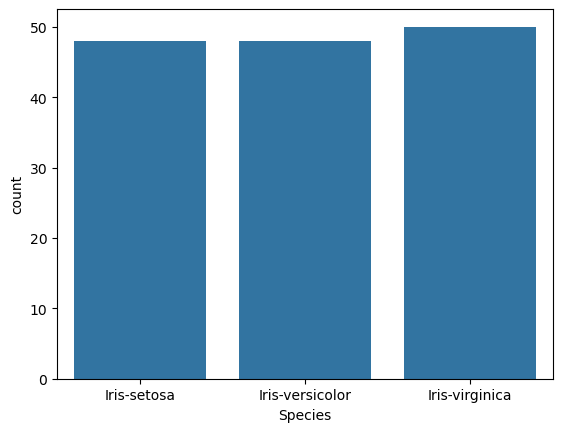

In [47]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
 
sns.countplot(x='Species', data=df, )
plt.show()

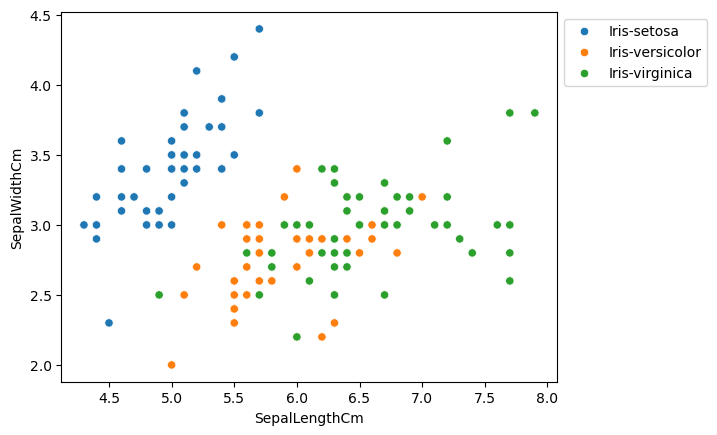

In [48]:
#Relation between variables
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

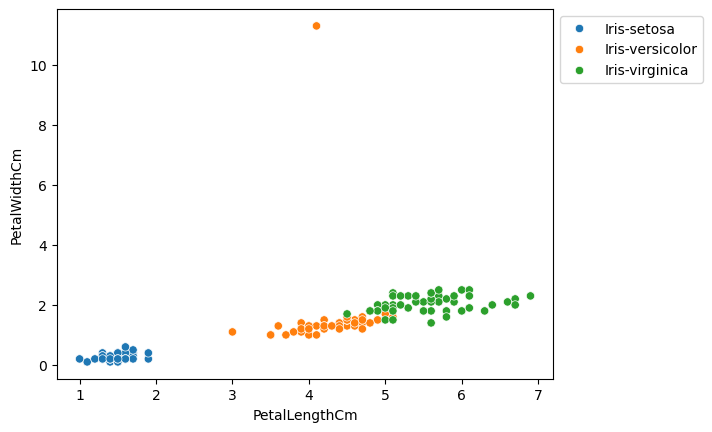

In [49]:
#Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

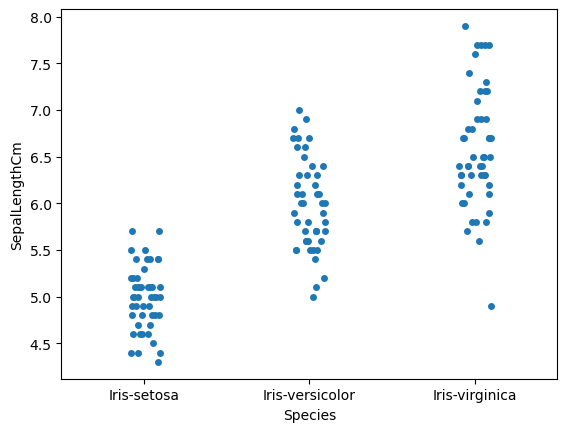

In [50]:
sns.stripplot(y ='SepalLengthCm', x = 'Species', data = df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

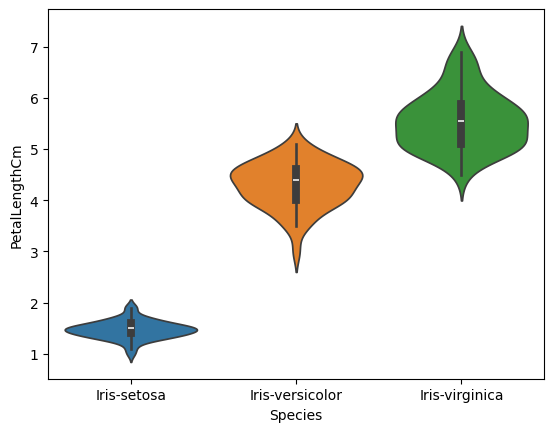

In [51]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, hue="Species")

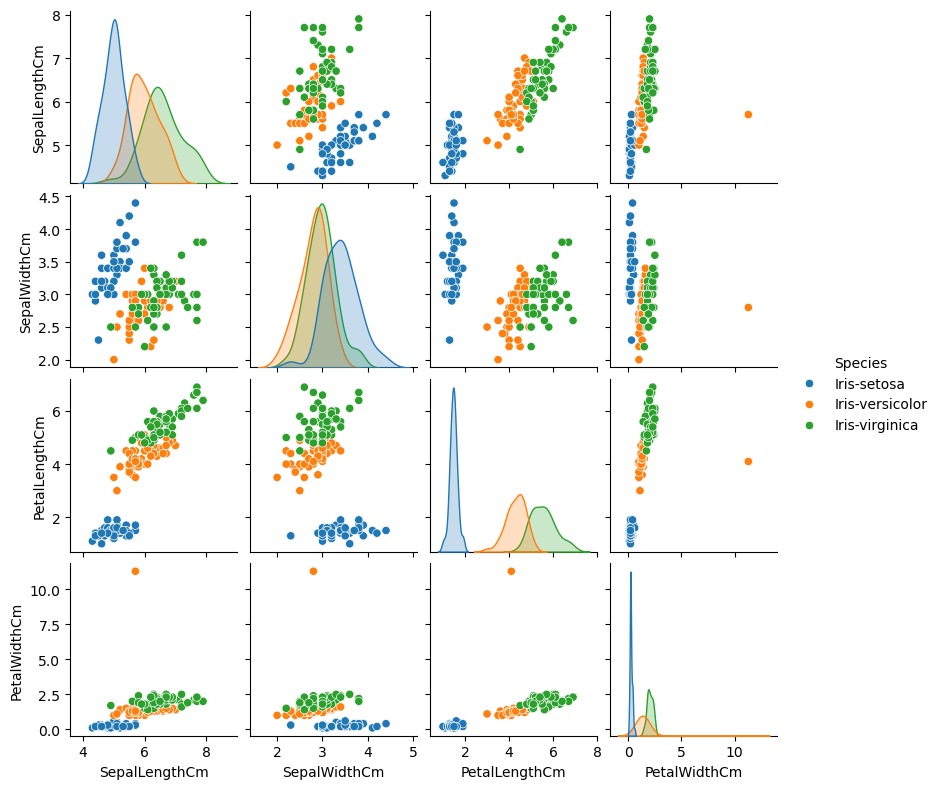

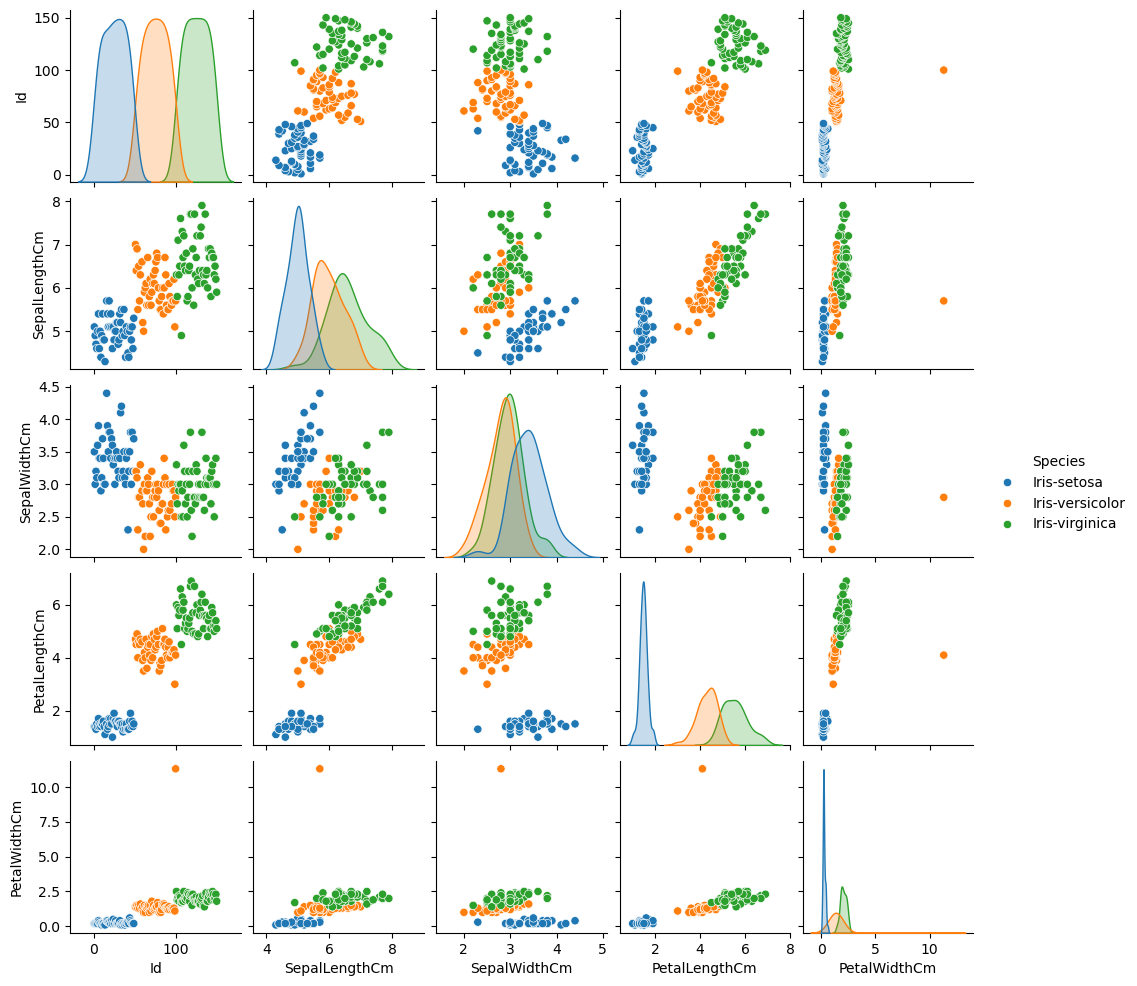

In [52]:
#compare all the variables
sns.pairplot(df.drop(['Id'], axis = 1), hue='Species', height=2)

# Do you see why this is wrong? 
sns.pairplot(df, hue='Species', height=2)

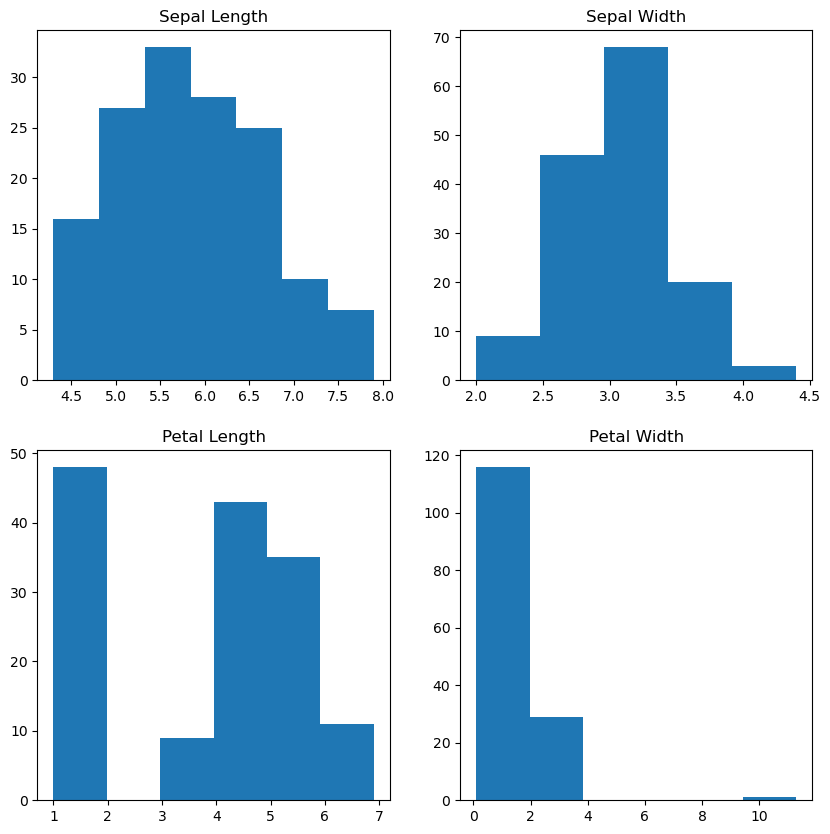

In [53]:
#histograms
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5)
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6)
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6)
plt.show()

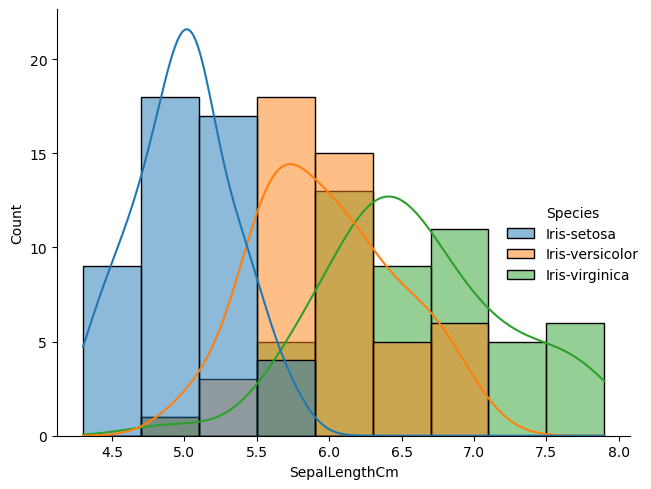

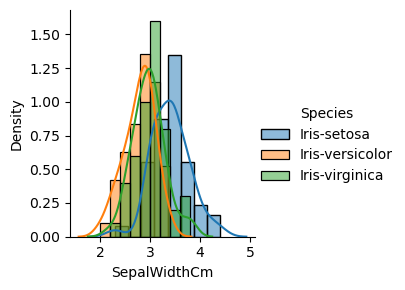

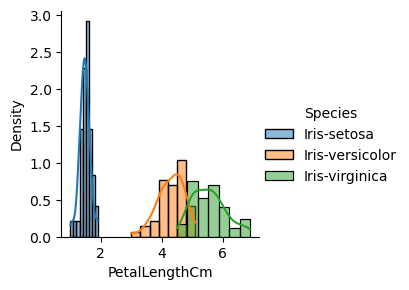

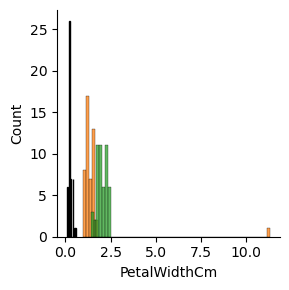

In [54]:
#Fall 2024 comment: This still works bu
# plot = sns.FacetGrid(df, hue="Species")
# plot.map(sns.displot, "SepalLengthCm").add_legend()
# plt.show()

sns.displot(df, x="SepalLengthCm", hue="Species", kde=True,).add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalWidthCm", kde=True, stat="density", kde_kws=dict(cut=3)).add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalLengthCm", kde=True, stat="density").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalWidthCm")#, kde=True, kde_kws=dict(cut=3)).add_legend()
 
plt.show()

## 3D plotting

In [55]:
#May have to uncomment to install plotly
#pip install plotly

In [56]:
#3D plot
import plotly.express as px
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',color='Species')
fig.show()

## 4. Correlation

In [57]:
df.corr(numeric_only=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.726591,-0.391521,0.883709,0.641898
SepalLengthCm,0.726591,1.000000,-0.134497,0.880143,0.544457
SepalWidthCm,-0.391521,-0.134497,1.000000,-0.420466,-0.276397
PetalLengthCm,0.883709,0.880143,-0.420466,1.000000,0.659908
PetalWidthCm,0.641898,0.544457,-0.276397,0.659908,1.000000


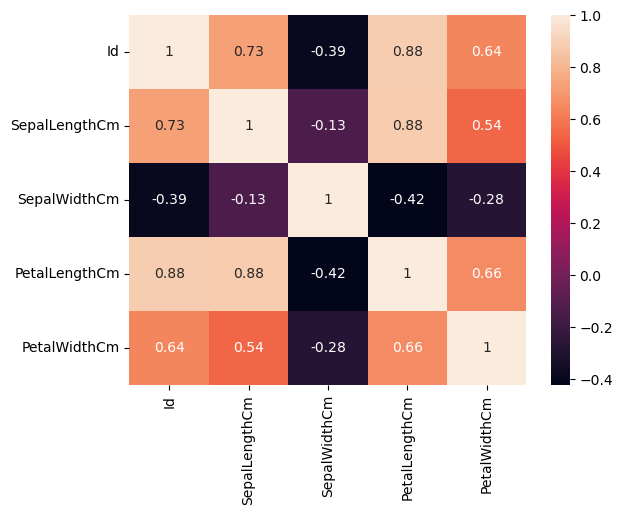

In [58]:
#This cell illustrates what happens when you ignore deprecation warnings for too long.

sns.heatmap(df.corr(method='pearson', numeric_only=True),
            annot = True);
 
plt.show()


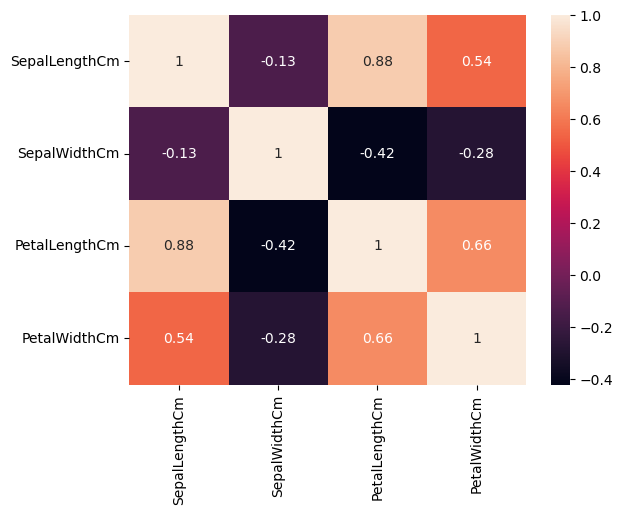

In [59]:
# sns.heatmap(df.corr(numeric_only=True).drop(
#   ['Id'], axis=1).drop(['Id'], axis=0),
#             annot = True);

sns.heatmap(df.drop(columns="Id").corr(numeric_only=True), annot=True)
 
plt.show()


## 5. Detecting/removing  outliers

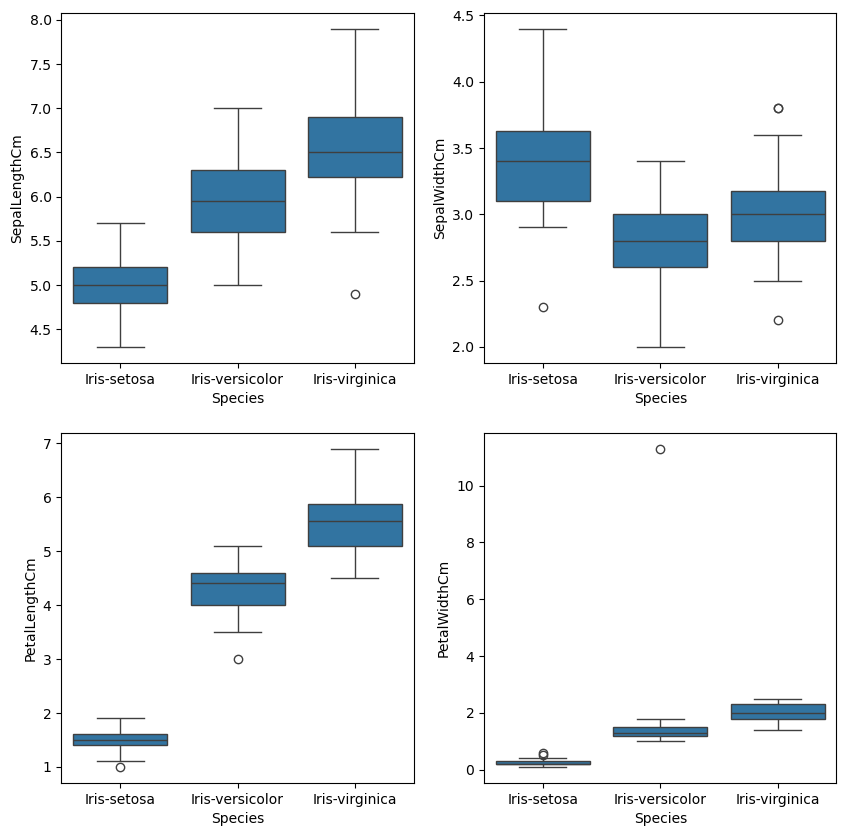

In [60]:
#/boxplots
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
 
plt.subplot(222)
graph('SepalWidthCm')
 
plt.subplot(223)
graph('PetalLengthCm')
 
plt.subplot(224)
graph('PetalWidthCm')
 
plt.show()

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
99  100            5.7           2.8            4.1          11.3   

            Species  
99  Iris-versicolor  
Index([99], dtype='int64') 11.3


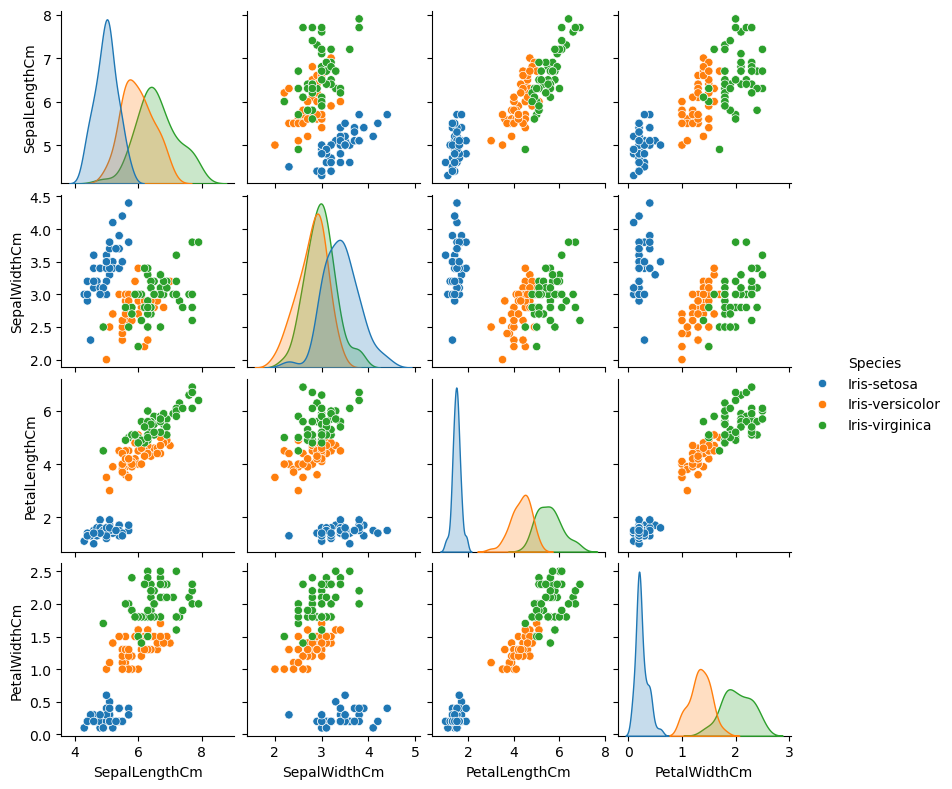

In [61]:
#ignore='''
# Find and drop the PetalWidthCm outlier
outlier = df[(df['Species'] == 'Iris-versicolor') & (df['PetalWidthCm'] > 10)]
print(outlier)
outlier_index=outlier.index
outlier_value=outlier['PetalWidthCm'].sum()
print(outlier_index, outlier_value)
#The simplest way to handle an outlier is to just throw it away. 
df2 = df.drop(outlier_index)
sns.pairplot(df2.drop(['Id'], axis = 1), hue='Species', height=2)
#'''

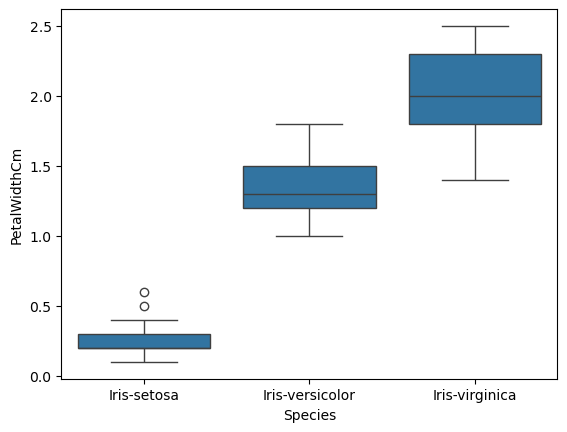

In [62]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df2)
 
plt.show()

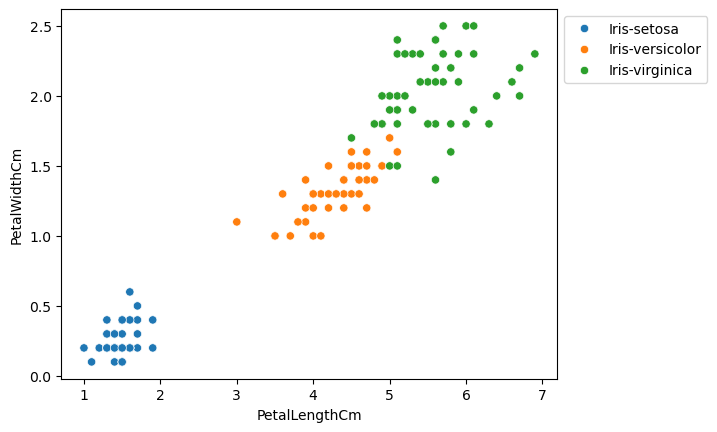

In [63]:
#Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df2, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()